In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")

In [6]:
print(orders.head())




   Unnamed: 0  order_id  order_date  product_id  quantity  total_price
0           0         1  2023-07-13          24         9      3726.45
1           1         2  2023-02-08          75         1       182.71
2           2         3  2023-02-14           6         6      2879.58
3           3         4  2023-10-07          16         7      2218.37
4           4         5  2023-02-03         100        10      3540.80


In [7]:
print(products.head())

   Unnamed: 0  product_id   product_name     category   price
0           0           1       ubaltprv  Электроника  466.47
1           1           2        tDBDlti   Аксессуары  342.91
2           2           3  SSoERVQYlXlXo        Книги   44.12
3           3           4  bSyPlTJrVTVEn   Аксессуары   15.49
4           4           5         OUlXxH   Аксессуары  451.51


In [10]:
print(orders.shape)

(100, 6)


In [12]:
print(products.shape)

(100, 5)


In [15]:
orders.isna().sum()

Unnamed: 0     0
order_id       0
order_date     0
product_id     0
quantity       0
total_price    0
dtype: int64

In [16]:
products.isna().sum()

Unnamed: 0      0
product_id      0
product_name    0
category        0
price           0
dtype: int64

In [17]:
orders.drop('Unnamed: 0', axis=1, inplace=True)
products.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
print(orders.head(100))

    order_id  order_date  product_id  quantity  total_price
0          1  2023-07-13          24         9      3726.45
1          2  2023-02-08          75         1       182.71
2          3  2023-02-14           6         6      2879.58
3          4  2023-10-07          16         7      2218.37
4          5  2023-02-03         100        10      3540.80
..       ...         ...         ...       ...          ...
95        96  2023-06-03          93         4      1112.60
96        97  2023-06-26           6         4      1919.72
97        98  2023-07-16          67         8      2574.24
98        99  2023-06-22          79        10      4752.90
99       100  2023-04-02          31         2       994.78

[100 rows x 5 columns]


In [19]:
print(products.head())

   product_id   product_name     category   price
0           1       ubaltprv  Электроника  466.47
1           2        tDBDlti   Аксессуары  342.91
2           3  SSoERVQYlXlXo        Книги   44.12
3           4  bSyPlTJrVTVEn   Аксессуары   15.49
4           5         OUlXxH   Аксессуары  451.51


In [22]:
merged_data=pd.merge(orders,products,on="product_id", how="inner")

In [25]:
sales_per_category=merged_data.groupby('category')['total_price'].sum().reset_index()


Text(0, 0.5, 'Total Sales ($)')

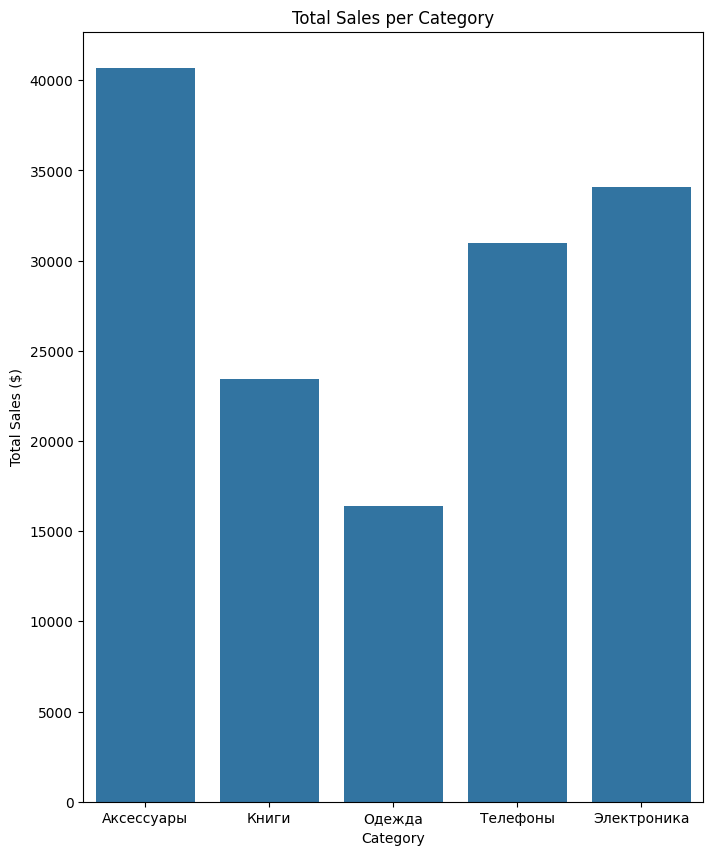

In [48]:
plt.figure(figsize=(8, 10))
bars=sns.barplot(data=sales_per_category, x='category', y='total_price')
plt.title('Total Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
#plt.xticks(rotation=45)

 

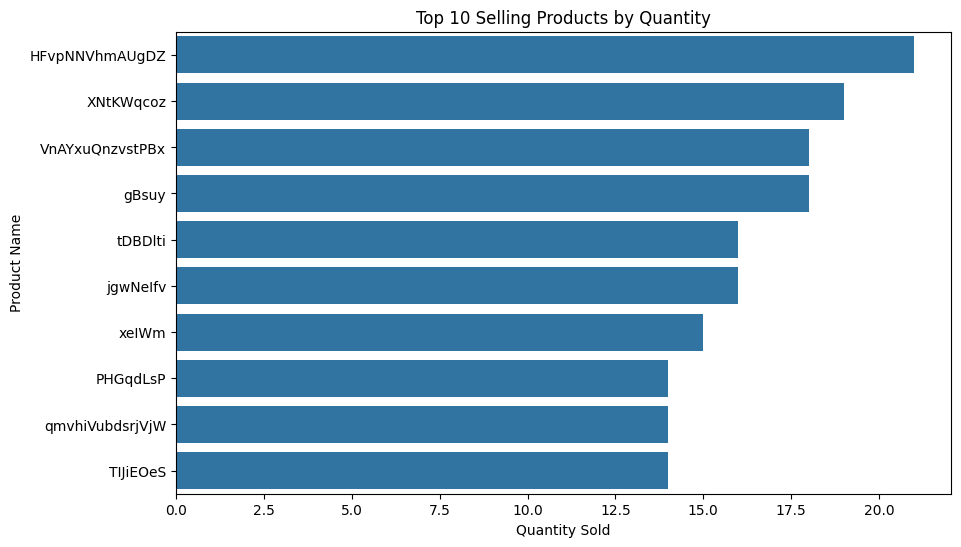

In [42]:
top_products = merged_data.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


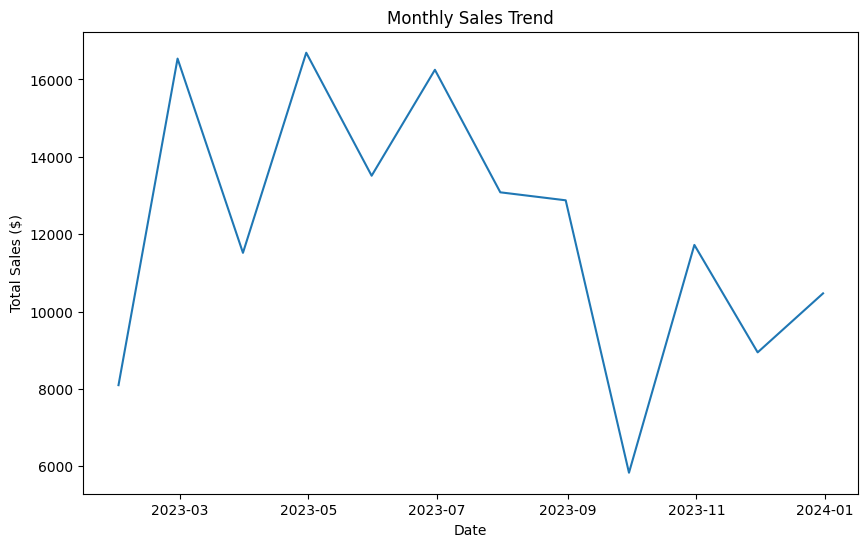

In [49]:
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])
monthly_sales = merged_data.resample('M', on='order_date')['total_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='order_date', y='total_price')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.show()

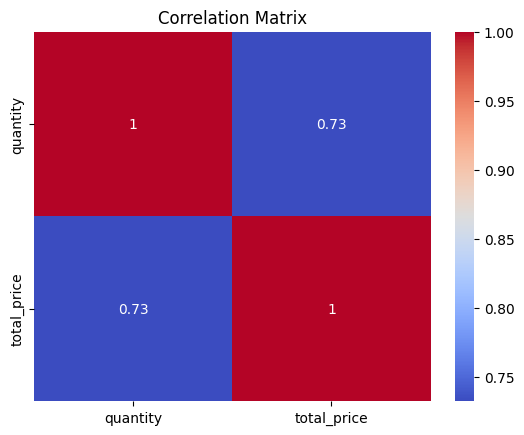

In [50]:
correlation_matrix = merged_data[['quantity', 'total_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

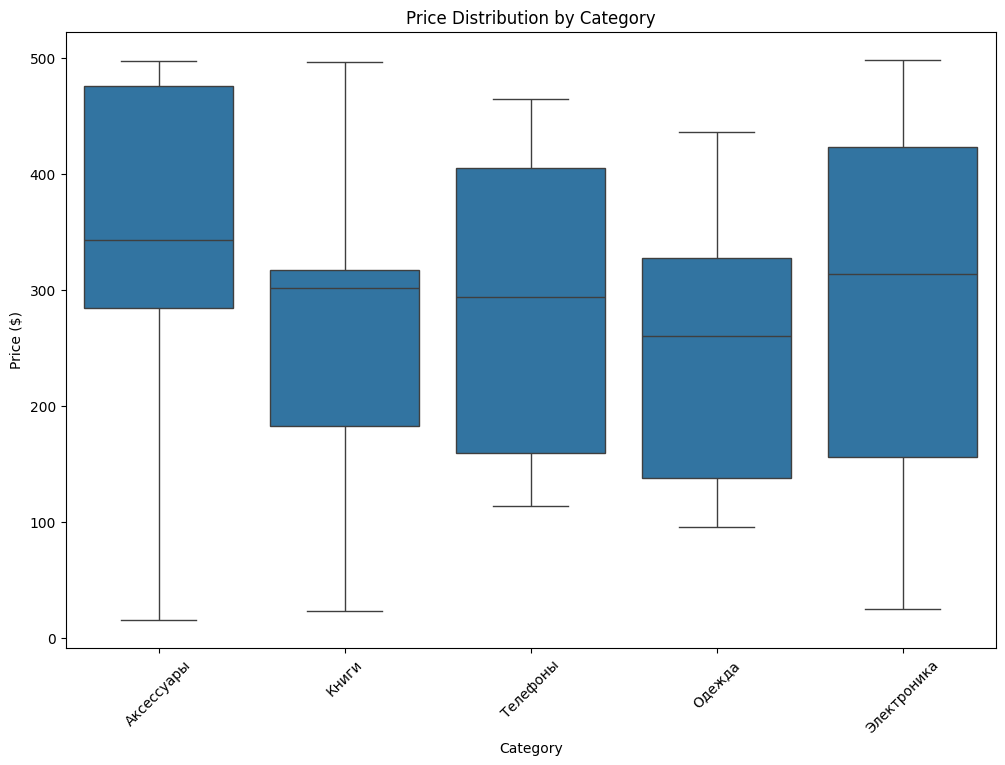

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='category', y='price')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()